In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
import os

In [2]:
train = pd.read_csv(r"C:\Users\kriti\Downloads\housing_train.csv ")
test = pd.read_csv(r"C:\Users\kriti\Downloads\housing_test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.dtypes.value_counts() 

object     43
int64      35
float64     3
dtype: int64

In [6]:
cat_feature = train.columns[train.dtypes == object]
cat_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
con_feature = train.columns[train.dtypes != object]
con_feature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
train[cat_feature].isna().sum().sort_values(ascending=True)

MSZoning            0
PavedDrive          0
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
SaleType            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
SaleCondition       0
HouseStyle          0
Street              0
LotShape            0
RoofStyle           0
Utilities           0
LotConfig           0
LandContour         0
BldgType            0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Electrical          1
MasVnrType          8
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
BsmtExposure       38
BsmtFinType2       38
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
dtype: int64

In [9]:
cat_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
train = train.drop(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis = 1)

KeyError: "['FireplaceQu' 'Fence' 'Alley' 'MiscFeature' 'PoolQC'] not found in axis"

In [12]:
cat_feature = train.columns[train.dtypes == object]
cat_feature

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
train[cat_feature].isna().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
SaleCondition     0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
RoofStyle         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
HouseStyle        0
ExterCond         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleType          0
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functional        0
PavedDrive        0
MSZoning          0
dtype: int64

Text(0.5, 1.0, 'GarageType')

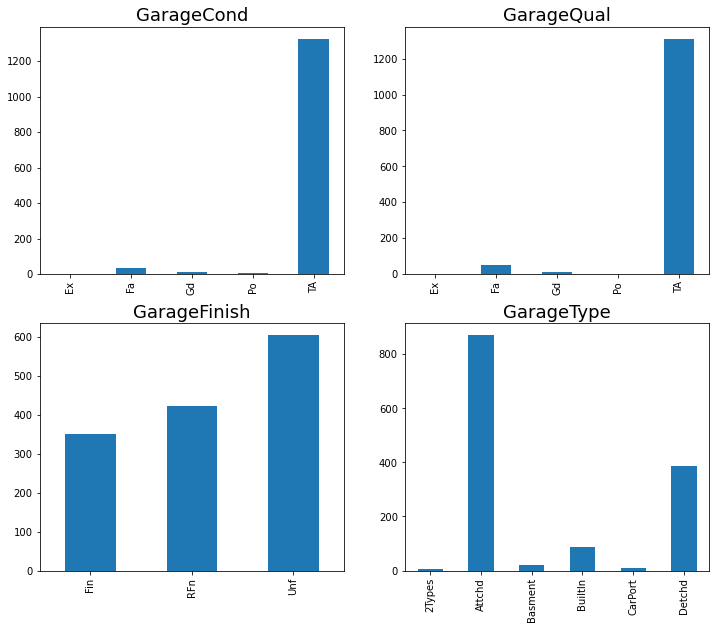

In [14]:
#finding relationship with sale prices 
fig, axes = plt.subplots(2,2, figsize=(12,10)) 

train.GarageCond.value_counts().sort_index().plot.bar(ax=axes[0][0]) 
axes[0][0].set_title("GarageCond", fontsize=18)

train.GarageQual.value_counts().sort_index().plot.bar(ax=axes[0][1]) 
axes[0][1].set_title("GarageQual", fontsize=18)

train.GarageFinish.value_counts().sort_index().plot.bar(ax=axes[1][0]) 
axes[1][0].set_title("GarageFinish", fontsize=18)

train.GarageType.value_counts().sort_index().plot.bar(ax=axes[1][1]) 
axes[1][1].set_title("GarageType", fontsize=18)

In [15]:
#From the above plot we understand if the forage quality good and if we have furnished garage is there then sale price increases.

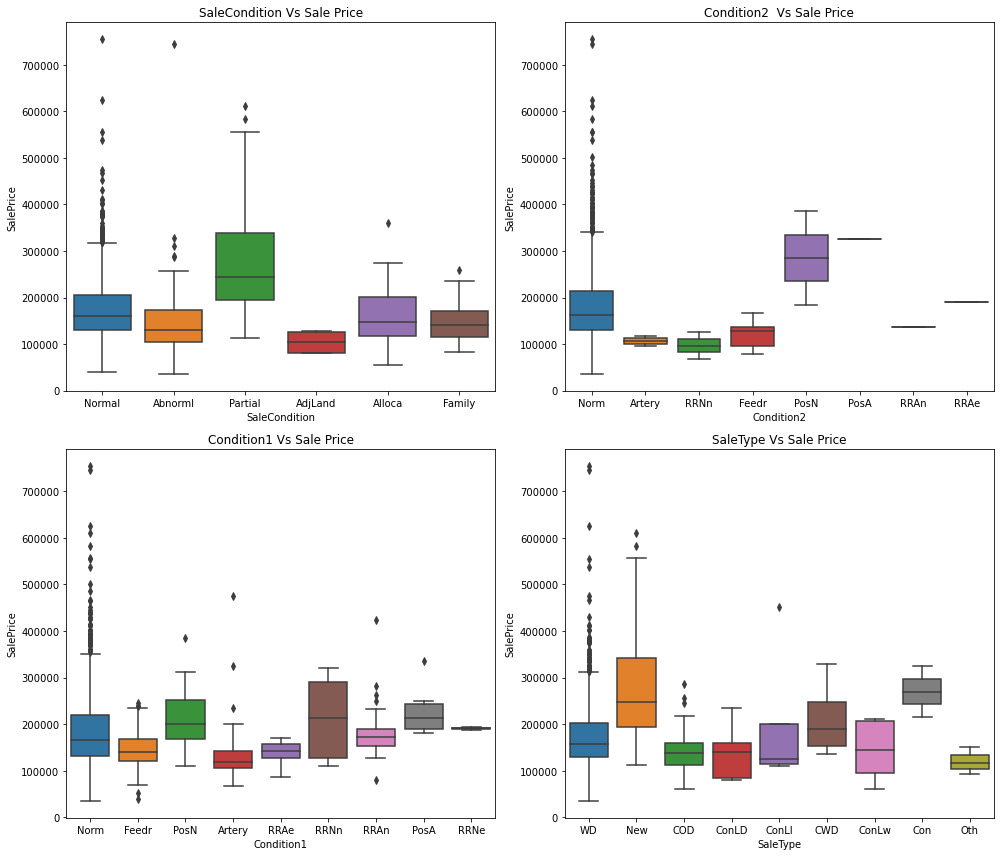

In [16]:
fig, axis = plt.subplots(2,2, figsize = (14,12))

sns.boxplot(data=train, x = 'SaleCondition', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('SaleCondition Vs Sale Price' )

sns.boxplot(data=train, x = 'Condition2', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('Condition2  Vs Sale Price' )

sns.boxplot(data=train, x = 'Condition1', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('Condition1 Vs Sale Price' )

sns.boxplot(data=train, x = 'SaleType', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('SaleType Vs Sale Price')

plt.tight_layout()

In [17]:
#so from above we get that if the sale type is new then the price of the home increase
#and most important thing in EDA is understanding all features and their attributes.

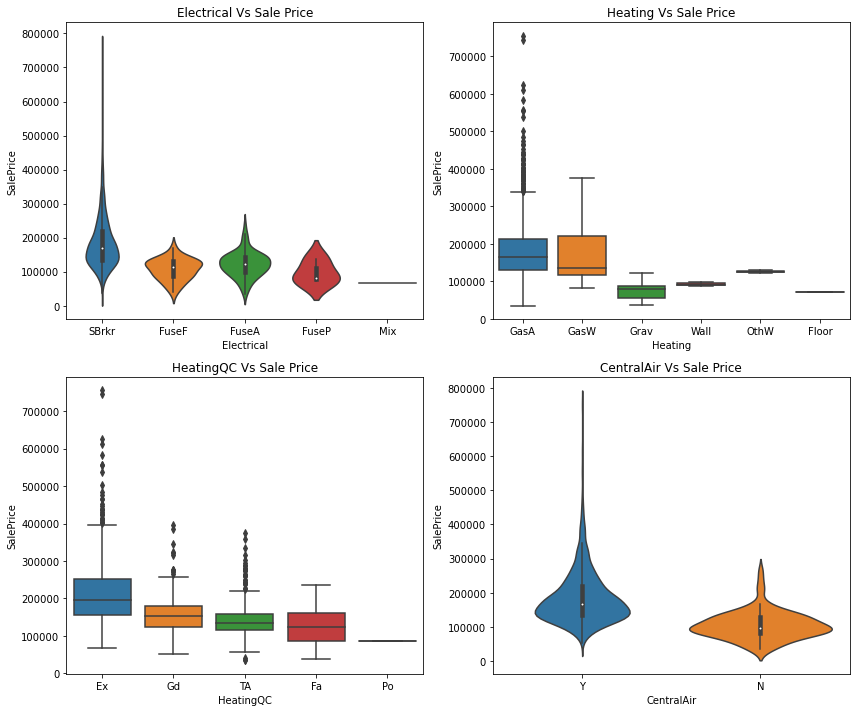

In [18]:
fig, axis = plt.subplots(2,2, figsize = (12,10))

sns.violinplot(data=train, x = 'Electrical', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('Electrical Vs Sale Price' )

sns.boxplot(data=train, x = 'Heating', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('Heating Vs Sale Price' )

sns.boxplot(data=train, x = 'HeatingQC', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('HeatingQC Vs Sale Price' )

sns.violinplot(data=train, x = 'CentralAir', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('CentralAir Vs Sale Price')

plt.tight_layout()